In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Если seaborn установлен - раскомментируйте строку ниже
# import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')  # Хороший стиль графиков
print("✅ Библиотеки загружены. Готов к анализу!")

✅ Библиотеки загружены. Готов к анализу!


In [4]:
# Загрузка данных Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)  # Теперь переменная df создана!

print(f"✅ Данные загружены. Размер: {df.shape[0]} строк, {df.shape[1]} столбцов")
print("\nСписок колонок:", list(df.columns))
print("\nПервые 3 строки:")
df.head(3)

✅ Данные загружены. Размер: 891 строк, 12 столбцов

Список колонок: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Первые 3 строки:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Создаем таблицу с информацией о пропусках
missing_info = pd.DataFrame({
    'Кол-во пропусков': df.isnull().sum(),
    'Доля пропусков, %': (df.isnull().sum() / len(df) * 100).round(2)
})
# Показываем только колонки с пропусками
missing_data = missing_info[missing_info['Кол-во пропусков'] > 0]
missing_data.sort_values('Доля пропусков, %', ascending=False)

,Кол-во пропусков,"Доля пропусков, %"
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


### 🔍 Анализ пропущенных значений
На основе анализа данных:
1.  **Больше всего пропусков** в колонках: **`Cabin`** (77.10%) и **`Age`** (19.87%).
2.  Колонка `Embarked` имеет незначительные пропуски (0.22%).

In [6]:
# ВАЖНО: столбец называется 'Pclass', а не 'Class' (это была вчерашняя ошибка)
survival_pivot = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
# Форматируем как проценты
(survival_pivot * 100).round(2)

Sex,female,male
Pclass,,
1,96.81,36.89
2,92.11,15.74
3,50.00,13.54


### 📈 Анализ выживаемости
Из таблицы видно:
-   **Самый высокий шанс выжить** у **женщин 1-го класса** (~96.81%).
-   **Самый низкий шанс** у **мужчин 3-го класса** (~13.54%).
-   **Вывод:** Пол и социально-экономический статус (класс) были ключевыми факторами.

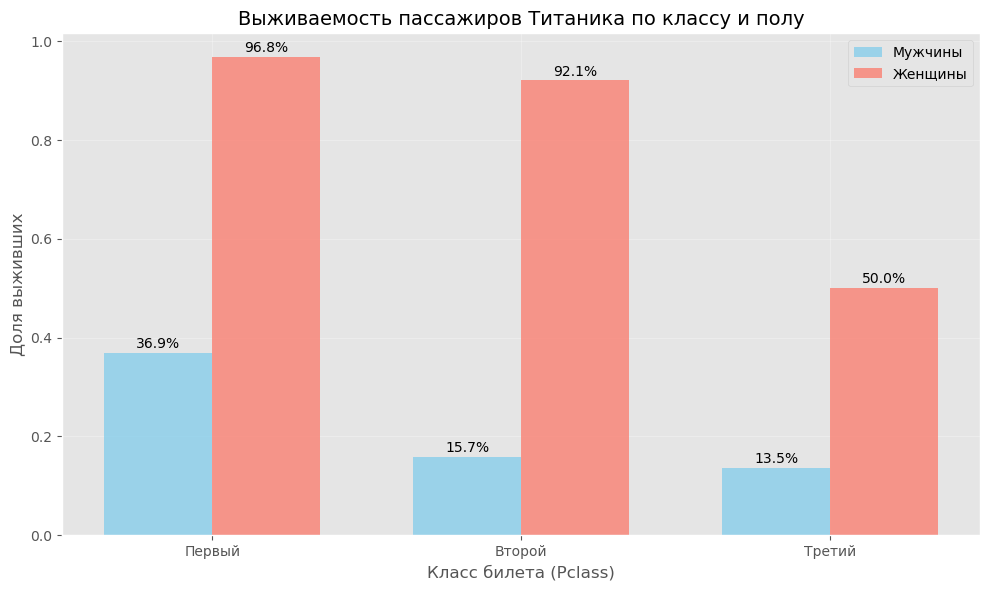

In [7]:
# Создаем фигуру
plt.figure(figsize=(10, 6))

# Готовим данные: средняя выживаемость по классу и полу
survival_for_plot = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

# Создаем группированный bar-plot вручную
width = 0.35  # Ширина столбцов
x = np.arange(len([1, 2, 3]))  # Позиции для классов

# Разделяем данные по полу
male_data = survival_for_plot[survival_for_plot['Sex'] == 'male']
female_data = survival_for_plot[survival_for_plot['Sex'] == 'female']

# Рисуем столбцы
plt.bar(x - width/2, male_data['Survived'], width, label='Мужчины', color='skyblue', alpha=0.8)
plt.bar(x + width/2, female_data['Survived'], width, label='Женщины', color='salmon', alpha=0.8)

# Настройка графика
plt.title('Выживаемость пассажиров Титаника по классу и полу', fontsize=14)
plt.xlabel('Класс билета (Pclass)')
plt.ylabel('Доля выживших')
plt.xticks(x, ['Первый', 'Второй', 'Третий'])
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for i, v in enumerate(male_data['Survived']):
    plt.text(i - width/2, v + 0.01, f'{v:.1%}', ha='center')
for i, v in enumerate(female_data['Survived']):
    plt.text(i + width/2, v + 0.01, f'{v:.1%}', ha='center')

plt.tight_layout()
plt.show()

### 🖼️ Визуализация выживаемости
Представленный график наглядно показывает:
1.  **Огромный разрыв** в выживаемости между мужчинами и женщинами во всех классах.
2.  Для женщин **важен класс** (снижение выживаемости от 1 к 3 классу).
3.  Для мужчин класс имел **меньшее влияние**, их шансы были низкими во всех классах.

In [8]:
# Создаем копию данных для экспериментов
df_enhanced = df.copy()

# 1. Признак "Размер семьи"
df_enhanced['FamilySize'] = df_enhanced['SibSp'] + df_enhanced['Parch'] + 1
# 2. Признак "Одинокий"
df_enhanced['IsAlone'] = (df_enhanced['FamilySize'] == 1).astype(int)

print("✅ Созданы новые признаки: 'FamilySize' и 'IsAlone'")
print("\nВыживаемость по размеру семьи:")
print(df_enhanced.groupby('FamilySize')['Survived'].mean().round(3).head())
print("\nВыживаемость одиноких (1) vs с семьей (0):")
print(df_enhanced.groupby('IsAlone')['Survived'].mean().round(3))

✅ Созданы новые признаки: 'FamilySize' и 'IsAlone'

Выживаемость по размеру семьи:
FamilySize
1    0.304
2    0.553
3    0.578
4    0.724
5    0.200
Name: Survived, dtype: float64

Выживаемость одиноких (1) vs с семьей (0):
IsAlone
0    0.506
1    0.304
Name: Survived, dtype: float64


In [10]:
import os

# Создаем папку data, если она не существует
if not os.path.exists('data'):
    os.makedirs('data')
    print("✅ Создана папка 'data'")

# Сохраняем улучшенный датасет
df_enhanced.to_csv('data/titanic_enhanced.csv', index=False)
print("✅ Обработанные данные сохранены в 'data/titanic_enhanced.csv'")
print(f"Файл содержит {df_enhanced.shape[1]} столбцов.")

✅ Создана папка 'data'
✅ Обработанные данные сохранены в 'data/titanic_enhanced.csv'
Файл содержит 14 столбцов.


## 🎯 Ключевые выводы из Дня 2

1.  **Главные факторы выживания:** Пол (женский) и класс билета (первый) давали наибольшее преимущество.
2.  **Качество данных:** Есть проблема с пропусками, особенно в столбцах `Cabin` и `Age`.
3.  **Новые признаки:** Признаки `FamilySize` и `IsAlone` могут быть полезны для будущих моделей, так как выживаемость в небольших семьях (2-4 человека) была выше.
4.  **Визуализация:** Группированные bar-чарты эффективно показывают взаимодействие нескольких категориальных признаков.